In [1]:
import hameg_trb 
import hameg_lv  
import phidrive
import micos_eco
import wallplugs
import numpy as np 
from matplotlib import pyplot as plt
# scope?

import time

import ROOT
import os
from my_utils import *
import fst

def power_cycle_usb():
  wallplugs.a_off()
  time.sleep(3)
  wallplugs.a_on()
  time.sleep(3)
    
def power_cycle_micos():
  wallplugs.b_off()
  time.sleep(3)
  wallplugs.b_on()
  time.sleep(6)
  micos_eco.send_cmd("1 1 setaxis")
  micos_eco.send_cmd("1 2 setaxis")
  micos_eco.send_cmd("2.0 1 setpitch")
  micos_eco.send_cmd("2.0 2 setpitch")
  micos_eco.cal()
  time.sleep(3)
  print("micos eco pos :")
  print(micos_eco.pos())
    

Welcome to JupyROOT 6.14/04


In [2]:
print("### test micos ###")
print(micos_eco.pos())
print("\n")

print("### test phidrive ###")
print(phidrive.get_angle())
print("\n")

print("### test HAMEG TRB ###")
hameg_trb.report()
print("\n")

print("### test HAMEG lv ###")
hameg_lv.report()
print("\n")

### test micos ###
(18.0, 40.0, 0.0)


### test phidrive ###
0.0


### test HAMEG TRB ###
device: /dev/ttyUSB_HAMEG_TRB
volt 24.000000 curr 0.581300 state 1
volt 24.000000 curr 0.581200 state 1
volt 2.000000 curr 0.025900 state 1
volt 1.500000 curr 0.247900 state 1


### test HAMEG lv ###
device: /dev/ttyUSB_HAMEG_LV
volt 4.000000 curr 0.422800 state 1
volt 5.000000 curr 0.345500 state 1
volt 0.000000 curr 0.000000 state 0
volt 0.000000 curr 0.000000 state 0




In [12]:
print(micos_eco.pos())

(0.0, 39.0, 0.0)


In [21]:
#micos_eco.move(y=100,x=100) ## far side
#micos_eco.move(y=0,x=100) ## units in mm
micos_eco.move(y=100,x=0) ## units in mm
#micos_eco.move(y=70,x=0) ## strahlhoehe
#micos_eco.move(x=0,y=0) ## parking pos

(88.44841, 11.55159, 0.0)
(84.05441, 15.94559, 0.0)
(79.67041, 20.32959, 0.0)
(75.28841, 24.71159, 0.0)
(70.89041, 29.10959, 0.0)
(66.48841, 33.51159, 0.0)
(62.09441, 37.90559, 0.0)
(57.69841, 42.30159, 0.0)
(53.29041, 46.70959, 0.0)
(48.90441, 51.09559, 0.0)
(44.51441, 55.48559, 0.0)
(40.09641, 59.90359, 0.0)
(35.69641, 64.30359, 0.0)
(31.29841, 68.70159, 0.0)
(26.90641, 73.09359, 0.0)
(22.51441, 77.48559, 0.0)
(18.10841, 81.89159, 0.0)
(13.71241, 86.28759, 0.0)
(9.33041, 90.66959, 0.0)
(4.93241, 95.06759, 0.0)
(0.533, 99.467, 0.0)
(0.0, 100.0, 0.0)
done


In [22]:
micos_eco.move(x=18,y=39) ## maximum of diamond rate in beam 

(3.41396, 88.43041, 0.0)
(4.70995, 84.03841, 0.0)
(6.00594, 79.64641, 0.0)
(7.3037, 75.24841, 0.0)
(8.59733, 70.86441, 0.0)
(9.88979, 66.48441, 0.0)
(11.18342, 62.10041, 0.0)
(12.48118, 57.70241, 0.0)
(13.77894, 53.30441, 0.0)
(15.07316, 48.91841, 0.0)
(16.36679, 44.53441, 0.0)
(17.66692, 40.12841, 0.0)
(18.0, 39.0, 0.0)
done


In [8]:
import scalers

X = np.arange(0, 20, 2)
Y = np.arange(40-10, 40+10, 2)

rates = np.zeros(( len(Y) , len(X)))

acq_time=2

#print(rates)

i=0
j=0
for y in Y:
  j=0
  for x in X:
    micos_eco.move(x=x,y=y)
    
    
    while True:
    
      curr_rates = scalers.scaler_rate("0x0351",[3,30],acq_time)
      scint_rate = curr_rates[1]
      dut_rate = curr_rates[0]
    
      print("pos: {:f} x {:f}".format(x,y))
      print("scint_rate: {:f}".format(scint_rate))
      print("dut_rate: {:f}".format(dut_rate))
      print("dut/trigger rate: {:f}".format( dut_rate/(scint_rate+0.001)))
      
      if scint_rate > 100*acq_time:
        rates[i,j] = dut_rate/scint_rate
        print("okay, next step")
        break
      else:
        print("spill break, measure again")
    
    j+=1
  i+=1

print("scan finished")

print(rates)

(6.39041, 33.55023, 0.0)
(1.99041, 31.10578, 0.0)
(0.0, 30.0, 0.0)
done
pos: 0.000000 x 30.000000
scint_rate: 34068.000000
dut_rate: 16.000000
dut/trigger rate: 0.000470
okay, next step
(2.0, 30.0, 0.0)
done
pos: 2.000000 x 30.000000
scint_rate: 36118.000000
dut_rate: 0.000000
dut/trigger rate: 0.000000
okay, next step
(4.0, 30.0, 0.0)
done
pos: 4.000000 x 30.000000
scint_rate: 38715.000000
dut_rate: 5.000000
dut/trigger rate: 0.000129
okay, next step
(6.0, 30.0, 0.0)
done
pos: 6.000000 x 30.000000
scint_rate: 45994.000000
dut_rate: 25.000000
dut/trigger rate: 0.000544
okay, next step
(8.0, 30.0, 0.0)
done
pos: 8.000000 x 30.000000
scint_rate: 47654.000000
dut_rate: 0.000000
dut/trigger rate: 0.000000
okay, next step
(10.0, 30.0, 0.0)
done
pos: 10.000000 x 30.000000
scint_rate: 49777.000000
dut_rate: 5.000000
dut/trigger rate: 0.000100
okay, next step
(12.0, 30.0, 0.0)
done
pos: 12.000000 x 30.000000
scint_rate: 50908.000000
dut_rate: 3.000000
dut/trigger rate: 0.000059
okay, next step

pos: 18.000000 x 38.000000
scint_rate: 187.000000
dut_rate: 0.000000
dut/trigger rate: 0.000000
spill break, measure again
pos: 18.000000 x 38.000000
scint_rate: 158.000000
dut_rate: 0.000000
dut/trigger rate: 0.000000
spill break, measure again
pos: 18.000000 x 38.000000
scint_rate: 165.000000
dut_rate: 0.000000
dut/trigger rate: 0.000000
spill break, measure again
pos: 18.000000 x 38.000000
scint_rate: 2990.000000
dut_rate: 9.000000
dut/trigger rate: 0.003010
okay, next step
(6.45241, 39.28306, 0.0)
(2.06841, 39.77017, 0.0)
(0.0, 40.0, 0.0)
done
pos: 0.000000 x 40.000000
scint_rate: 21287.000000
dut_rate: 17.000000
dut/trigger rate: 0.000799
okay, next step
(2.0, 40.0, 0.0)
done
pos: 2.000000 x 40.000000
scint_rate: 23837.000000
dut_rate: 21.000000
dut/trigger rate: 0.000881
okay, next step
(4.0, 40.0, 0.0)
done
pos: 4.000000 x 40.000000
scint_rate: 27842.000000
dut_rate: 26.000000
dut/trigger rate: 0.000934
okay, next step
(6.0, 40.0, 0.0)
done
pos: 6.000000 x 40.000000
scint_rate: 

saving to /workdir/jupyter/beam_profile_w_scalers_data/000.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/000.pickle


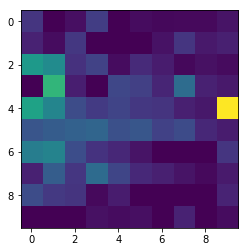

saving to /workdir/jupyter/beam_profile_w_scalers_data/001.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/001.pickle


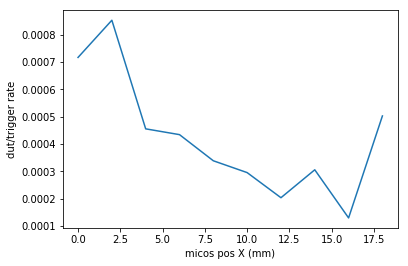

saving to /workdir/jupyter/beam_profile_w_scalers_data/002.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/002.pickle


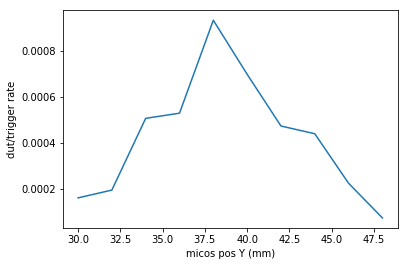

saving to /workdir/jupyter/beam_profile_w_scalers_data/relative_rates_matrix.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/X_mm.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/Y_mm.pickle


In [16]:
clear_data_dir()

plt.imshow(rates)
show(plt)

plt.plot(X,sum(rates)/len(Y))
plt.xlabel("micos pos X (mm)")
plt.ylabel("dut/trigger rate")
show(plt)

plt.plot(Y,sum(rates.transpose())/len(X))
plt.xlabel("micos pos Y (mm)")
plt.ylabel("dut/trigger rate")
show(plt)

pickle_this(rates,"relative_rates_matrix")
pickle_this(X,"X_mm")
pickle_this(Y,"Y_mm")